In [49]:
%run db_connection.ipynb

mongo = db_connection()
import pandas as pd

In [54]:
transactions = pd.DataFrame(mongo.get_transactions())
transactions
actors_transactions =pd.DataFrame( transactions["closed_transactions"][0])
actors_transactions

,_id,deliver_day,order_id,order_criation_day,sending_day,receiver,sender,product,quantity,transit_time,lead_time,theoretical_lead,transaction_id,delivered,update_day
0,2,2,2000001,1,1,1,2,2001,1,None,1,1,2,1,2
1,1,4,1000001,1,1,0,1,1001,1,None,3,3,1,1,4
2,4,4,2000002,2,2,1,2,2001,3,None,2,2,4,1,4
3,3,5,1000002,2,2,0,1,1001,1,None,3,3,3,1,5
4,8,5,2000004,4,4,1,2,2001,6,None,1,1,8,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,1183,365,1000362,362,362,0,1,1001,1,None,3,3,1183,1,365
1090,1187,365,1000363,363,363,0,1,1001,1,None,2,2,1187,1,365
1091,1181,365,2000361,361,361,1,2,2001,6,None,4,4,1181,1,365
1092,1179,365,3000334,360,360,2,3,3001,80,None,5,5,1179,1,365


In [57]:
actors_transactions[["_id","quantity"]].describe()

,_id,quantity
count,1094.000000,1094.000000
mean,603.485375,168.090494
std,344.941661,1087.488223
min,1.000000,1.000000
25%,312.250000,1.000000
50%,613.500000,6.000000
75%,901.750000,80.000000
max,1187.000000,10650.000000


C:\Users\Tiago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\plotting\_matplotlib\core.py:613: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001CFFE20FF70> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


<AxesSubplot:>

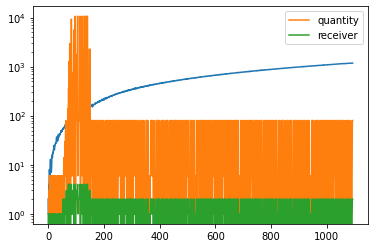

In [59]:
actors_transactions[["_id","quantity", "receiver"]].plot(logy=True)

In [52]:
df = actors_transactions[actors_transactions['receiver'] == 0]
df.describe()

,_id,deliver_day,order_id,order_criation_day,sending_day,receiver,sender,product,quantity,transit_time,lead_time,transaction_id,delivered,updated_day
count,365.000000,365.000000,3.650000e+02,365.000000,365.000000,365.0,365.0,365.0,365.0,135.0,135.0,365.000000,135.0,135.000000
mean,578.178082,186.463014,1.000183e+06,183.000000,183.000000,0.0,1.0,1001.0,1.0,0.0,0.0,578.178082,1.0,115.088889
std,301.035153,105.452541,1.055107e+02,105.510663,105.510663,0.0,0.0,0.0,0.0,0.0,0.0,301.035153,0.0,55.710803
min,1.000000,3.000000,1.000001e+06,1.000000,1.000000,0.0,1.0,1001.0,1.0,0.0,0.0,1.000000,1.0,17.000000
25%,330.000000,96.000000,1.000092e+06,92.000000,92.000000,0.0,1.0,1001.0,1.0,0.0,0.0,330.000000,1.0,68.500000
50%,621.000000,187.000000,1.000183e+06,183.000000,183.000000,0.0,1.0,1001.0,1.0,0.0,0.0,621.000000,1.0,114.000000
75%,839.000000,277.000000,1.000274e+06,274.000000,274.000000,0.0,1.0,1001.0,1.0,0.0,0.0,839.000000,1.0,163.500000
max,1030.000000,368.000000,1.000365e+06,365.000000,365.000000,0.0,1.0,1001.0,1.0,0.0,0.0,1030.000000,1.0,210.000000


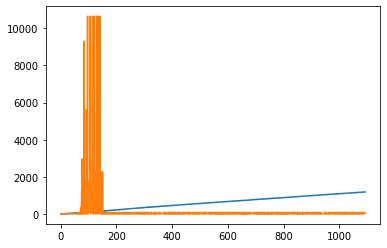

In [56]:
import matplotlib.pyplot as plt
plt.plot(actors_transactions[["_id","quantity"]])
plt.show()

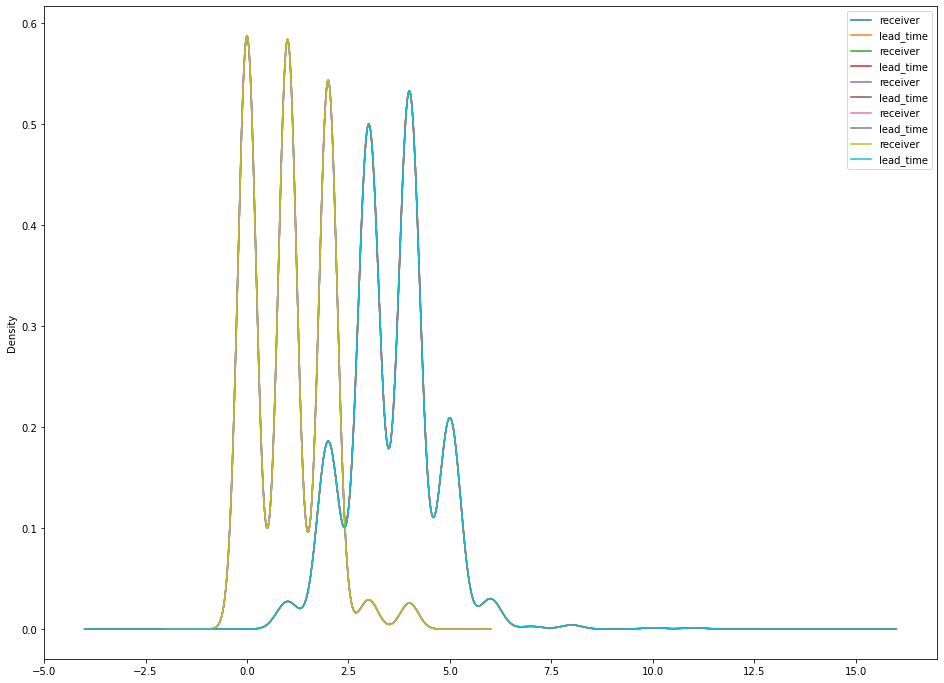

In [67]:
import matplotlib.pyplot as plt
p_df=actors_transactions[["receiver", "lead_time"]]
fig, ax = plt.subplots(figsize=(16,12))

for label, df in p_df.groupby('receiver'):
    p_df.plot(kind="kde", ax=ax, label=label)
plt.legend()

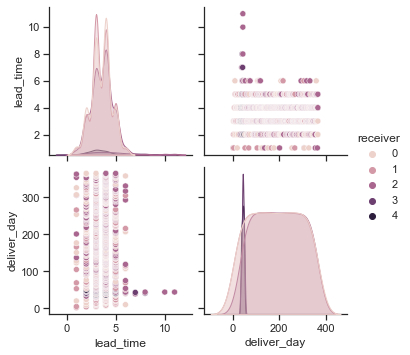

In [76]:
import seaborn as sns
#sns.set_theme(style="ticks")

df =actors_transactions[["receiver", "lead_time","deliver_day"]]
sns.pairplot(df, hue="receiver")

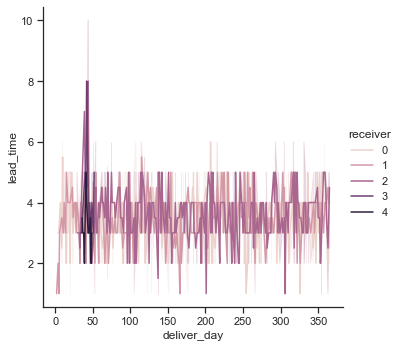

In [78]:
sns.relplot(x="deliver_day", y="lead_time",
            hue="receiver", 
            kind="line", data=actors_transactions[["receiver", "lead_time", "deliver_day"]]);